In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px

# **Dataset**

In [2]:
df = pd.read_csv(r'Final Transactions.csv')

* This Project is about fraud detection of any form such as : credit card fraudulent transcation, mobile banking fraudulent transcation, etc.. 
* This dataset contains several features : 1 - TRANSACTION_ID: Represents a unique identifier for each transaction.
2 - TX_DATETIME: Represents the date and time of the transaction.
3 - CUSTOMER_ID: Represents the unique identifier of the customer who made the transaction.
4 - TERMINAL_ID: Represents the unique identifier of the terminal where the transaction was made.
5 - TX_AMOUNT: Represents the amount of the transaction.
6 - TX_TIME_SECONDS: Represents the duration of the transaction in seconds.
7 - TX_TIME_DAYS: Represents the duration of the transaction in days.
8 - TX_FRAUD: indicates whether the transaction is fraudulent or not.
0 represents a legitimate transaction and 1 represents a fraudulent transaction.
9 - TX_FRAUD_SCENARIO: represents the type of fraudulent scenario.
0 indicates no fraud, and other values indicate different types of fraud scenarios which i specified previously.

In [3]:
df.head(20)

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
5,5,5,2023-01-01 00:10:45,568,8803,401.17,645,0,0,0
6,6,6,2023-01-01 00:11:30,2803,5490,938.54,690,0,0,0
7,7,7,2023-01-01 00:11:44,4684,2486,206.53,704,0,0,0
8,8,8,2023-01-01 00:11:53,4128,8354,253.47,713,0,0,0
9,9,9,2023-01-01 00:13:44,541,6212,555.63,824,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [5]:
df.describe().round(2)

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00
mean,877077.00,877077.00,2504.01,4996.73,539.68,7903233.71,90.97,0.13,0.14
std,506381.08,506381.08,1445.99,2886.10,1179.71,4565172.38,52.84,0.34,0.39
min,0.00,0.00,0.00,0.00,0.00,31.00,0.00,0.00,0.00
25%,438538.50,438538.50,1252.00,2502.00,179.95,3940846.50,45.00,0.00,0.00
50%,877077.00,877077.00,2506.00,4994.00,421.75,7902670.00,91.00,0.00,0.00
75%,1315615.50,1315615.50,3765.00,7495.00,750.60,11865661.50,137.00,0.00,0.00
max,1754154.00,1754154.00,4999.00,9999.00,647837.50,15811197.00,182.00,1.00,3.00


In [6]:
df.isna().sum()

Unnamed: 0           0
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [7]:
df.corr().style.background_gradient(cmap='coolwarm')

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
Unnamed: 0,1.000000,1.000000,-0.000389,-0.000690,0.002455,0.999999,0.999985,0.002650,0.004748
TRANSACTION_ID,1.000000,1.000000,-0.000389,-0.000690,0.002455,0.999999,0.999985,0.002650,0.004748
CUSTOMER_ID,-0.000389,-0.000389,1.000000,0.000389,-0.002633,-0.000389,-0.000389,0.004353,0.002359
TERMINAL_ID,-0.000690,-0.000690,0.000389,1.000000,-0.000758,-0.000690,-0.000690,-0.002160,-0.003291
TX_AMOUNT,0.002455,0.002455,-0.002633,-0.000758,1.000000,0.002453,0.002449,0.313427,0.416883
TX_TIME_SECONDS,0.999999,0.999999,-0.000389,-0.000690,0.002453,1.000000,0.999992,0.002650,0.004746
TX_TIME_DAYS,0.999985,0.999985,-0.000389,-0.000690,0.002449,0.999992,1.000000,0.002650,0.004746
TX_FRAUD,0.002650,0.002650,0.004353,-0.002160,0.313427,0.002650,0.002650,1.000000,0.949008
TX_FRAUD_SCENARIO,0.004748,0.004748,0.002359,-0.003291,0.416883,0.004746,0.004746,0.949008,1.000000


# Exploratory Data Analysis 

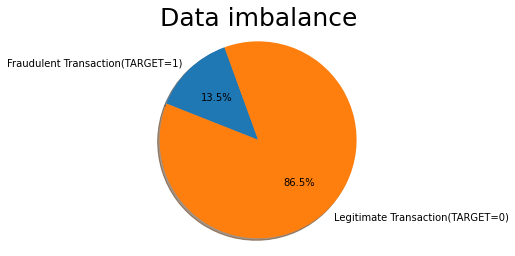

In [13]:
count1 = 0 
count0 = 0
for i in df['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]

fig1, ax1 = plt.subplots()
ax1.pie(y, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

This pie chart shows that the dataset is highly unbalanced because only 13.5% is fraudulent transaction while 86.5% is legitimate transaction which means before going deeply into the model selection , it will be necessary to balance it in order to ensure accurate modeling results.

In [14]:
df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]
grouped = df.groupby("TX_FRAUD_SCENARIO").size().reset_index(name="count")

fig = px.bar(grouped, x="TX_FRAUD_SCENARIO", y="count", color="TX_FRAUD_SCENARIO",
             labels={"TX_FRAUD_SCENARIO": "Fraud Scenario", "count": "Number of Transactions"})

fig.show()

This bar chart represents the fraud scenario and the corresponding number of transactions. The output shows the highest number of transactions occured due to type 1 of fraud scenario while the least number of transactions occured due to type 3 of fraud scenario.

In [15]:
df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]

grouped = df.groupby('TX_FRAUD_SCENARIO')['TX_AMOUNT'].mean().reset_index(name='mean_amount')

fig = px.bar(grouped, x='TX_FRAUD_SCENARIO', y='mean_amount', labels={'TX_FRAUD_SCENARIO':'Fraud Scenario','mean_amount':'Average Transaction Amount'})

fig.show()

This bar chart represents the fraud scenario and the corresponding average transaction amount. Although type 1 of fraud scenario had the highest number of transactions , but it has an average amount of transaction. And although type 3 of fraud scenario had the least number of transactions , but it has the highest amount of transaction.

# **Data** **Manipulation**

# **Balancing** **Data**

In [16]:
df = pd.read_csv(r'Final Transactions.csv')

df = df.drop(df.index[0])

fraud = df[df['TX_FRAUD'] == 1]

non_fraud = df[df['TX_FRAUD'] == 0]

n_non_fraud = len(non_fraud)

fraud_upsampled = fraud.sample(n_non_fraud, replace=True)

df_upsampled = pd.concat([fraud_upsampled, non_fraud])

df = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv('cleaned_transactions.csv', index=False)

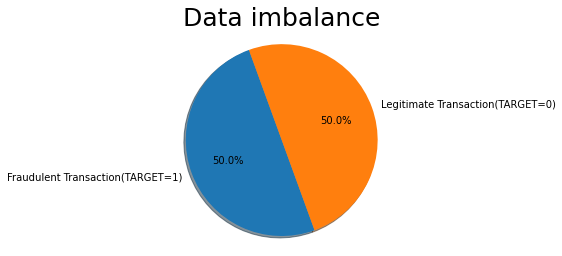

In [17]:
df = df_upsampled
count1 = 0 
count0 = 0
for i in df['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]

fig1, ax1 = plt.subplots()
ax1.pie(y, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

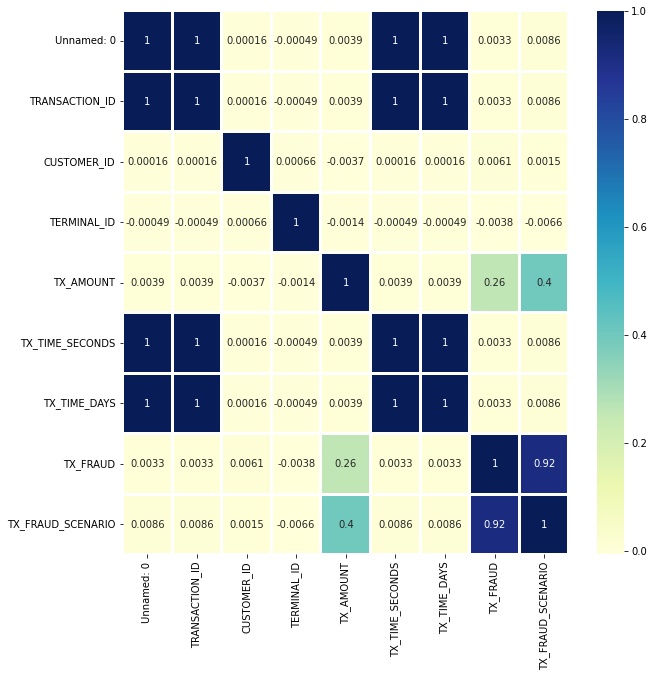

In [18]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "YlGnBu")

* The previously seaborn plot shows that the ['TX_AMOUNT'] ,['TX_TIME_SECONDS'], ['TX_TIME_DAYS'] features have highest number that causes fraud when related to fraud column while the rest features have lower values. Therefore feature selection will be done because most of the features represented in the dataset will not be needed as they wouldn't be enough to specify a fraud transaction.

# **Feature** **Extraction**

In [19]:
df = pd.read_csv('Final Transactions.csv')

df_features = df.drop(['TRANSACTION_ID', 'TX_FRAUD','TX_DATETIME','Unnamed: 0','CUSTOMER_ID','TERMINAL_ID','TX_FRAUD_SCENARIO'], axis=1)

print(df_features.head())

   TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS
0     533.07               31             0
1     808.56              130             0
2    1442.94              476             0
3     620.65              569             0
4     490.66              634             0


* Dropping the rest features because they can't specify properly if a fraudulent transaction had occured or not and therefore they are not needed
* Dropping ['TX_FRAUD'] because it will be considered as a target (y) not as a feature

# **Standardizing** **Data**

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_features = scaler.fit_transform(df_features)

# **Modeling**

# **Selecting** **Model**

In [21]:
from sklearn.model_selection import train_test_split
df = pd.read_csv(r'Final Transactions.csv')
X = standardized_features
y = df["TX_FRAUD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11,shuffle = True)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {"Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {acc:.3f}")

Logistic Regression accuracy: 0.994
Decision Tree accuracy: 0.991


This process shows that logistic regression's accuracy is a bit higher that decision tree's accuracy but will be proving it the next steps

# **Logistic** **Regression**

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

test_predict = model.predict(X_test)
test_predict

array([0, 1, 1, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predict) * 100

99.42108878633871

# **Decision** **Tree**

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_test, y_test)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [26]:
from sklearn.metrics import confusion_matrix
model = DecisionTreeClassifier(max_depth= None, min_samples_leaf=1,min_samples_split=2)
model.fit(X_train, y_train)

y_pred_DTC = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_DTC)
cm_DTC = confusion_matrix(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm_DTC)


Decision Tree Classifier:
Accuracy: 0.9905139511616704
Confusion Matrix:
 [[301851   1710]
 [  1618  45652]]


# **Evaluation of Decision Tree**

Text(0.5, 1.0, 'Confusion Matrix: Decision Tree Classifier')

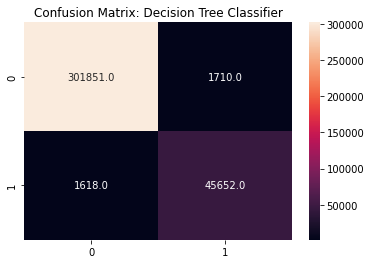

In [27]:
cm_sns_DTC = sns.heatmap(cm_DTC,annot=True,fmt='.1f')
cm_sns_DTC.set_title('Confusion Matrix: Decision Tree Classifier')

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_DTC = precision_score(y_test, y_pred_DTC)
recall_DTC = recall_score(y_test, y_pred_DTC)
f1_DTC = f1_score(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Precision: ", precision_DTC)
print("Recall: ", recall_DTC)
print("F1-Score: ", f1_DTC)

Decision Tree Classifier:
Precision:  0.9638951057810059
Recall:  0.9657711021789719
F1-Score:  0.9648321920703357


In [29]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_DTC)

print("Average precision-recall score: {:.2f}".format(average_precision))

Average precision-recall score: 0.94


* Decision Tree shows poor accuracy due to :  

1.   large dataset
2.   more than one feature
3.   large number of splits

which results in longer time in training and test plus poor accuracy when compared to logistic regression.


# **ANN**

In [30]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
43854/43854 [==============================] - 83s 2ms/step - loss: 0.0407 - accuracy: 0.9916
Epoch 2/10
43854/43854 [==============================] - 75s 2ms/step - loss: 0.0324 - accuracy: 0.9939
Epoch 3/10
43854/43854 [==============================] - 76s 2ms/step - loss: 0.0322 - accuracy: 0.9940
Epoch 4/10
43854/43854 [==============================] - 74s 2ms/step - loss: 0.0320 - accuracy: 0.9941
Epoch 5/10
43854/43854 [==============================] - 74s 2ms/step - loss: 0.0319 - accuracy: 0.9941
Epoch 6/10
43854/43854 [==============================] - 74s 2ms/step - loss: 0.0317 - accuracy: 0.9942
Epoch 7/10
43854/43854 [==============================] - 75s 2ms/step - loss: 0.0316 - accuracy: 0.9943
Epoch 8/10
43854/43854 [==============================] - 74s 2ms/step - loss: 0.0315 - accuracy: 0.9943
Epoch 9/10
43854/43854 [==============================] - 75s 2ms/step - loss: 0.0315 - accuracy: 0.9943
Epoch 10/10
43854/43854 [==============================

In [31]:
y_ann=ann.predict(X_test)
A=[]
for y in y_ann:
    if y>0.5:
        A.append(1)
    else:
        A.append(0)

10964/10964 [==============================] - 13s 1ms/step


In [32]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,A)
print(c)

[[303561      0]
 [  2077  45193]]


In [33]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,A)*100
print("test accuracy",a)

test accuracy 99.40797706017997


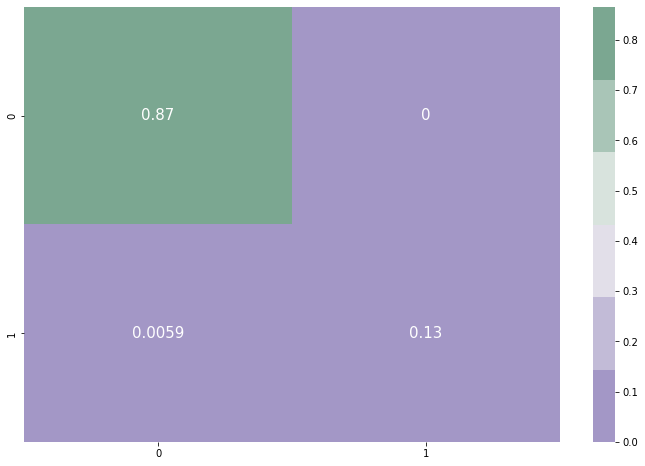

In [34]:
import seaborn as sns
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, A)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, A))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    303561
           1       1.00      0.96      0.98     47270

    accuracy                           0.99    350831
   macro avg       1.00      0.98      0.99    350831
weighted avg       0.99      0.99      0.99    350831



* I have also tried artifical neural network to deal with this dataset other than any type of machine learning but the accuracy of this deep learning model 99.407% is the same as logistic regression machine learning model 99.42%

* order from the highest accuracy to the lowest :
1.   Logistic Regression
2.   Artificial Neural Network
3.   Decision Tree

* if i had more time working on this project, i could have also tried random forest and K-Nearest Neighbor and see if they would make any difference.

* I think that dropping most of features had an impact on the loss of the dataset though the accuracy of the model was high.


